# Assignment #2 - Classification

**DHANANJAY ARORA**

# Introduction

Machine learning, these days is not only machine which is learning from the past. It started with the pattern recognition and computers learning on its own without the need of being explicitly programmed. But now, researchers want to computer to learn from data and perform tasks on its own. Some examples are:
- Self driving Google car
- Online recommendation offers as offers from Netflix
- Fraud detection

Only should know all mathematical concepts thoroughly in order to implement a good machine learning algorithm successfully.

This assignment aims at classification of a dataset with different feature values.

In machine learning and statistics, **classification** is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.

Firstly, data is fetched from a file; then pre-processing is done (transformation of raw data into understandable format), in which data is cleaned and important feature values are also taken into consideration etc. After that comes the most important task which is data visualization. It is important because large data means nothing unless some graphs are plotted based on that and some visualization is done.
After that comes the preliminary observation; which says, what is being understood or concluded based on the tasks performed before.

It is a supervised learning technique. Training and prediction is done on the dataset. Below are the names of the models:
1. Pocket Algorithm
2. QDA - Quadratic Discriminant Analysis
3. LDA - Linear Discriminant Analysis
4. Logistic Regression

Training and testing is done for "Bank Term Deposit Subscription classification"  data and accuracy is calculated.

## 1. Classification

## a) Introduction of data for Classification & source

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There is a dataset: 
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:
Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Source**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## b) Reading the data

- The data is present in a comma separated value file. Fetching the records from the CSV file.
- Header information is there in the CSV file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst

Reading dataset and making a feature list.

In [2]:
data_columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
complete_data= pd.read_csv("C:\\Users\\arora\\Documents\\bank-additional\\bank-additional-full.csv")

## c) Preprocessing of the data

Converting the target feature values as No = 0 and Yes = 1

In [3]:
complete_data['y'] = complete_data['y'].map({'no' : 0, 'yes' : 1})

Checking the data type of the dataset

In [4]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

Printing count of rows and columns as below:

In [5]:
complete_data.shape

(41188, 21)

It can be seen that there are 41188 rows and 21 feature values.

Performing some basic mathematical function on data set using describe() as below:

In [6]:
complete_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Listing the top 10 rows as below:

In [7]:
complete_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Listing the last 10 rows as below:

In [8]:
complete_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


Checking whether the data contains any null value as below:

In [9]:
complete_data.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

There is no null value in the dataset as it can be seen above.

Extracting the important feature list as below:

In [10]:
important_cols=complete_data.columns.tolist()
feature_list=important_cols[:9] + important_cols[11:]
print(feature_list)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Defining the data partition method, below:

In [11]:
def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

Dividing the dataset into training and test set.

In [12]:
data_partitions=partition_data(complete_data)
train_dataset=data_partitions[0]
print("The Shape of train data set is",train_dataset.shape)
test_dataset=data_partitions[1]
test_dataset.shape
print("The Shape of test data set is",test_dataset.shape)

The Shape of train data set is (32950, 21)
The Shape of test data set is (8238, 21)


Some basic mathematical computataions on dataset are as below:

In [13]:
train_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.026586,255.954780,2.671259,993.752473,0.072868,0.650337,93.704204,-40.637542,4.268969,5195.140176,0.063733
std,9.354139,261.236307,2.970139,72.022331,0.274573,1.160255,0.480555,3.866698,1.283868,44.854437,0.244280
min,18.000000,0.000000,1.000000,0.000000,0.000000,-1.800000,92.756000,-50.000000,1.299000,5099.100000,0.000000
25%,33.000000,100.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.700000,4.191000,5191.000000,0.000000
50%,39.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.864000,5195.800000,0.000000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.000000
max,95.000000,4918.000000,56.000000,999.000000,3.000000,1.400000,94.465000,-36.100000,5.045000,5228.100000,1.000000


Top 10 rows, below:

In [14]:
train_dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Last 10 rows below:


In [15]:
train_dataset.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32940,46,admin.,married,basic.6y,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32941,25,student,single,high.school,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32942,27,entrepreneur,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32943,32,blue-collar,married,basic.6y,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32944,38,services,married,high.school,unknown,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32945,36,admin.,married,high.school,no,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32946,49,blue-collar,single,high.school,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32947,30,technician,single,basic.9y,no,no,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32948,32,technician,single,high.school,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32949,34,technician,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


Checking dataset for any null values below:

In [16]:
 train_dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No null values seen above.

## d) Visualization of the data

Now we will vizualize the dataset.

**Plotting the Distribution Curves for the feature variables as below:**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


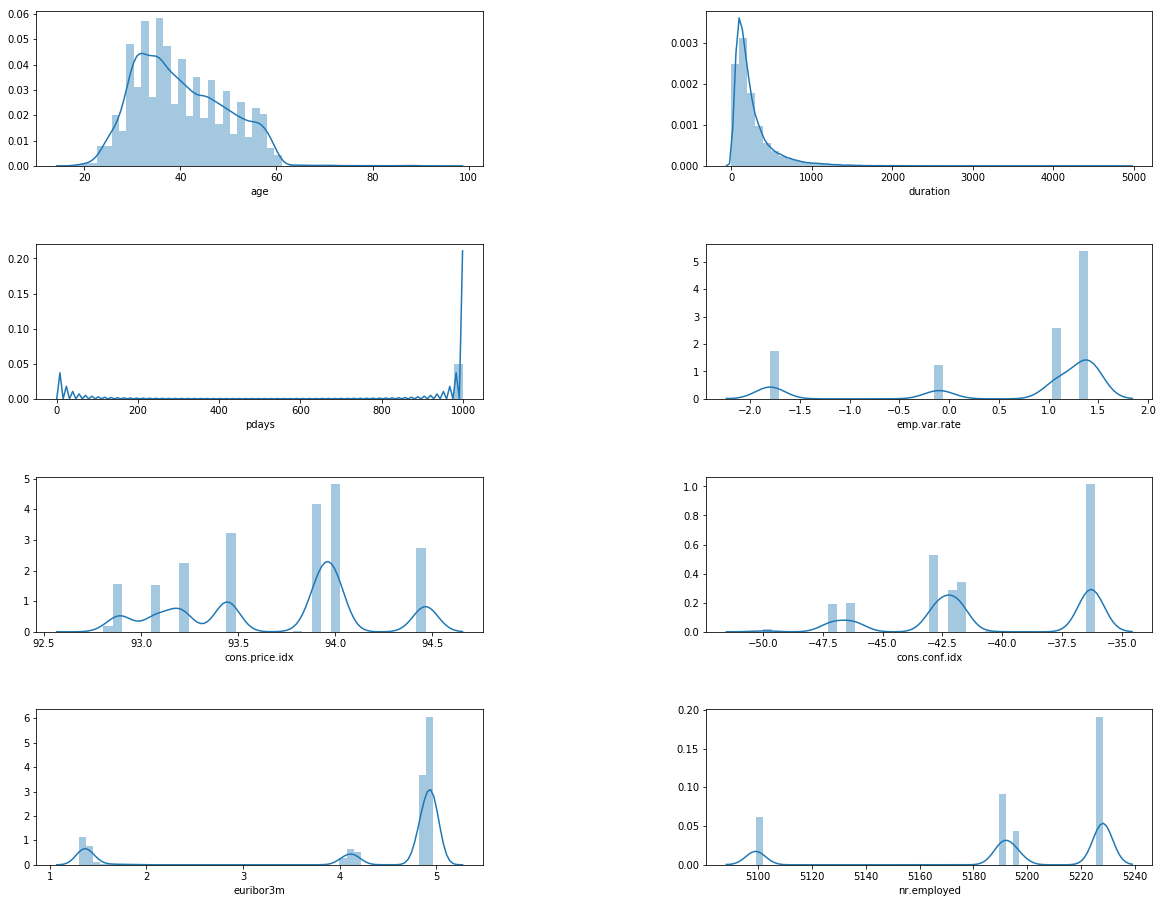

In [17]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['age','duration','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 9):
    ax = fig.add_subplot(5,2, i)
    ax = sns.distplot(train_dataset[distribution_plot_list[(i-1)]])

From the above image, it can be seen that mostly the age of customers is between 20 and 60. 

Also, consumer price index (monthly) is between 92.0 and 95.0

Since the number of pdays mostly is 999, that means most of the customers are new customers. 

Employment variation rate (quarterly indicator) value varies from -4 to 2.

Almost all individual call duration was between 0 and 1000 seconds.

Consumer confidence index (monthly indicator) value lies between -50 and -25 mostly.

Euribor 3 month rate - daily indicator mostly has value as 5.

Number of employees - quarterly indicator value varies from 4950 to 5250 mostly.

**Below is the correlation matrix**

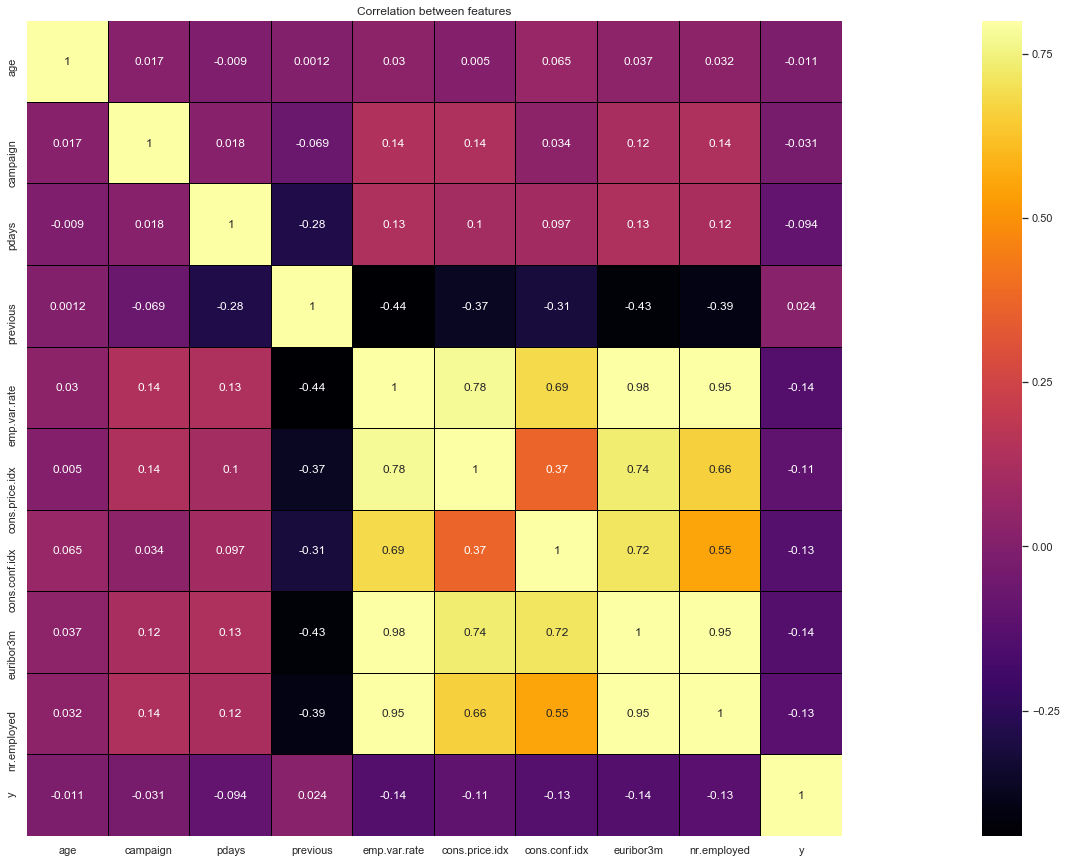

In [18]:
correlation_matrix=train_dataset[feature_list].corr()
sns.set(font_scale=1)
plt.figure(figsize=(50, 15))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='inferno',linecolor="black")
plt.title('Correlation between features');

Considering the above feature values, Number of contacts performed before this campaign and for this client is more related to client subscribing a term deposit as compared to other relations.

**Below is the bar-plot for client subscribing a term deposit vs his/her age**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


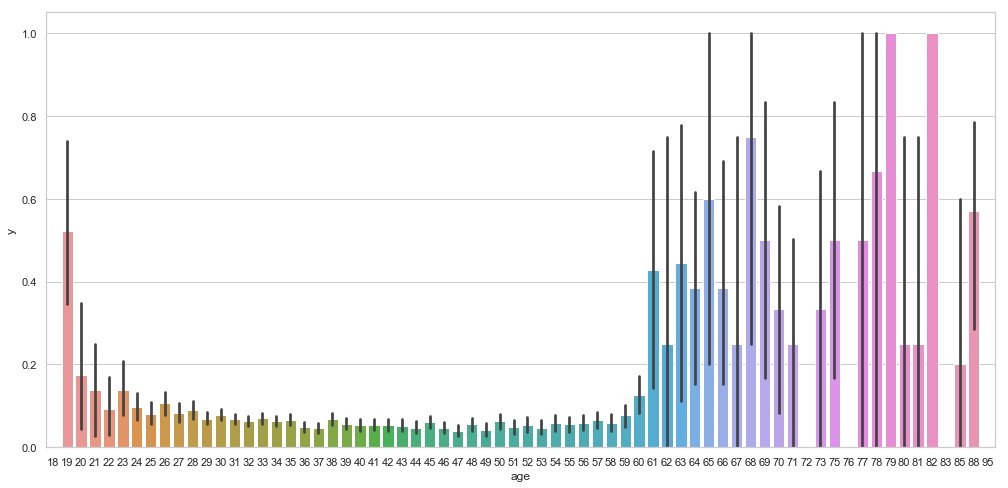

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,8))
ax = sns.barplot(x="age", y="y", data=train_dataset)

From the above bar-plot, it can be observed that major range of people who do not subscribe to the term deposit plan have age between 25 and 60. Elderly people subscribe the most to this plan.

Below is the bar plot for client subscribing a term deposit VS number of contacts performed during this campaign and for this client:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


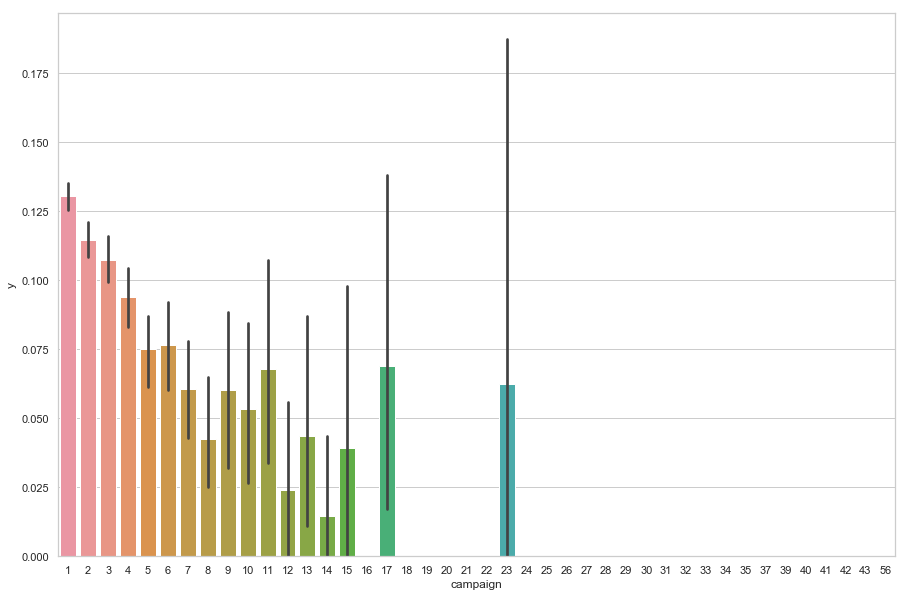

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="campaign", y="y", data=complete_data)

Most people bought the plan when the number of contacts performed during this campaign and for this client was 1. (observed from above figure) - on whole data

Below is the bar plot for client subscribing a term deposit VS type of job

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


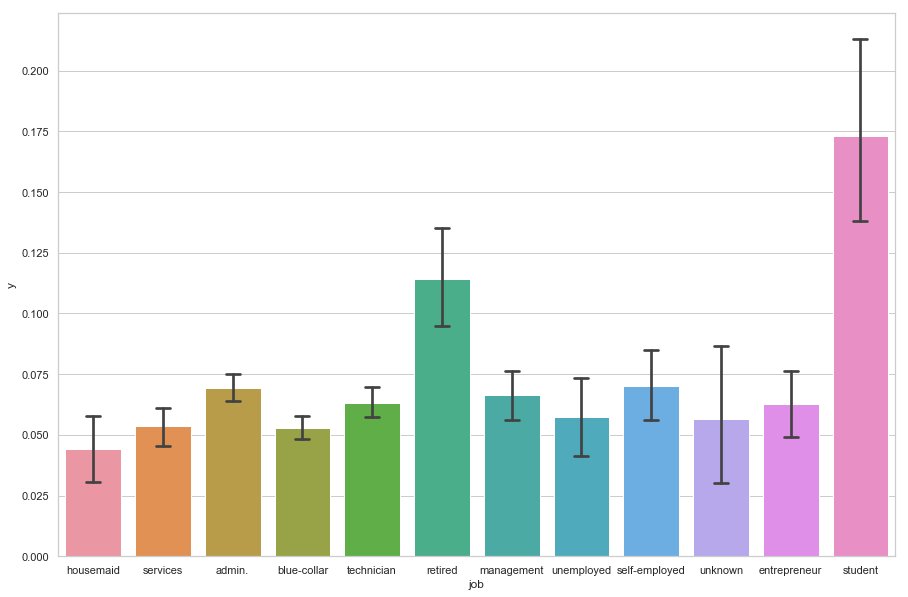

In [21]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="job", y="y", data=train_dataset, capsize=.2)

This above plot shows that students tend to subscribe more to the term-deposit plan and second come the retired people; whereas least term-deposit plans are subscribed by blue-collar job people and housemaid.

Below is the bar plot for client subscribing a term deposit VS their marital status:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


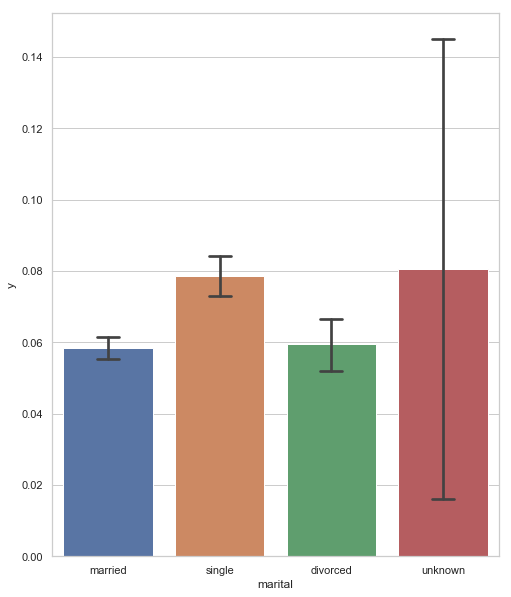

In [22]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x="marital", y="y", data=train_dataset, capsize=.2)

Mostly of the clients who have subscribed to term-deposit have not disclosed their marital status.
Second number is of clients who are single.

Below is the bar plot for client subscribing a term deposit VS education level:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


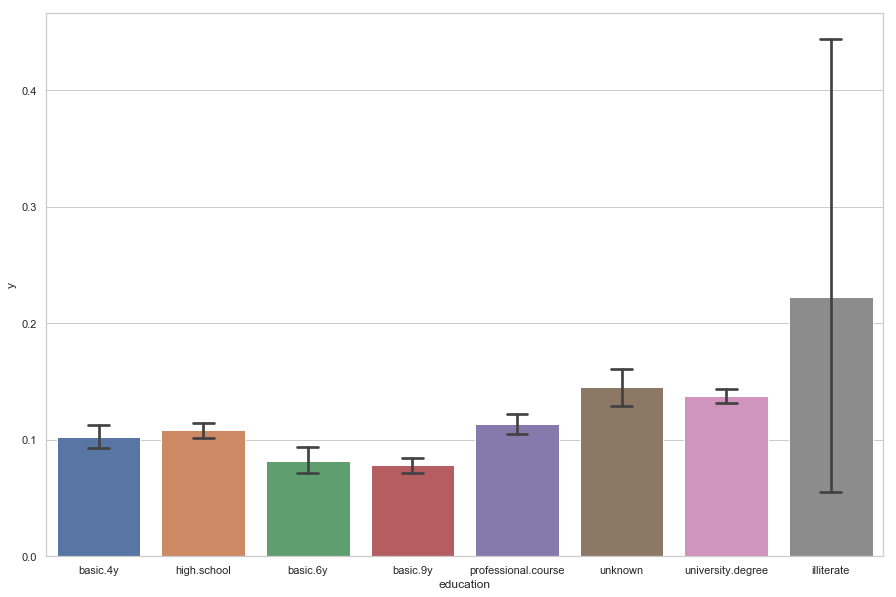

In [23]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="education", y="y", data=complete_data, capsize=.2)

Most clients who subscribe to this term-deposit plan are illiterate and least clients are those who have had only 9 years of education. (on complete data)

Below is the bar plot for client subscribing a term deposit VS clients having credit in default:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


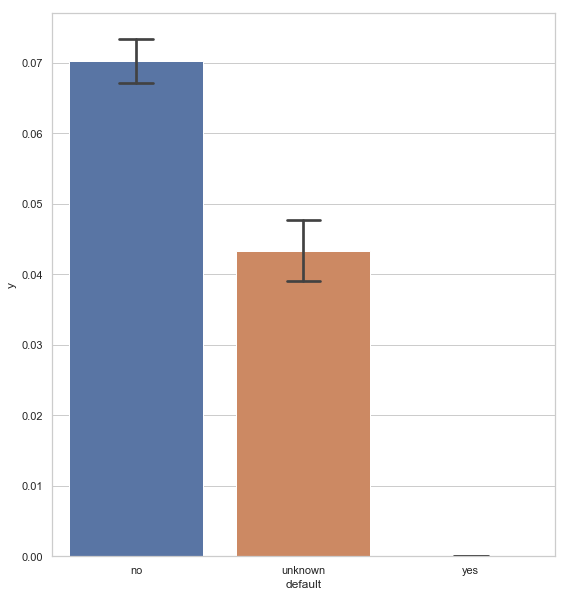

In [24]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="default", y="y", data=train_dataset, capsize=.2)

Most of the plans are bought by clients who have no credit in default.(seen from above plot)

Below is the bar plot for client subscribing a term deposit VS last contact month of year:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


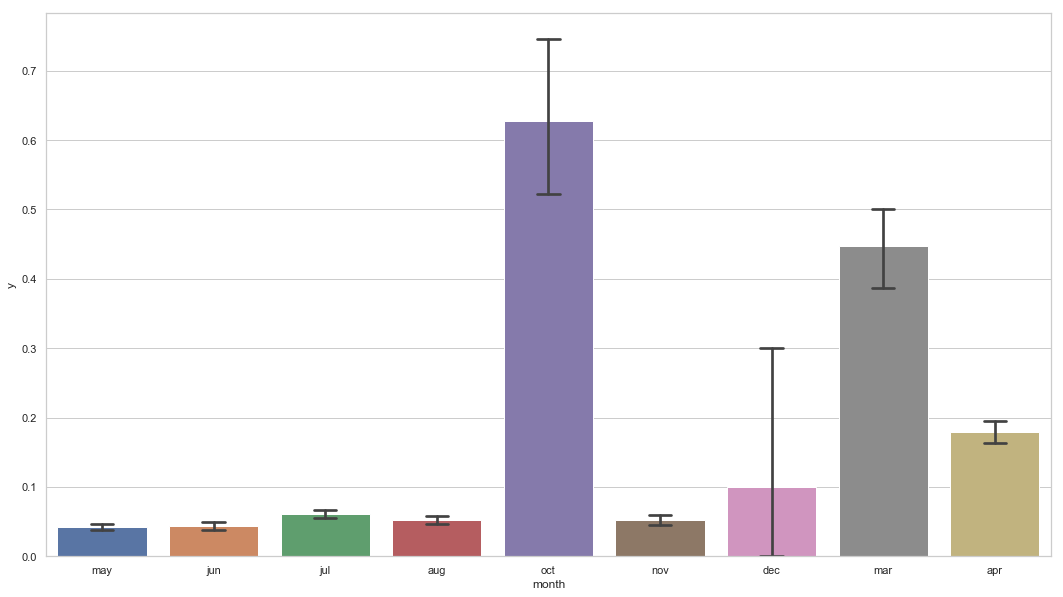

In [25]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x="month", y="y", data=train_dataset, capsize=.2)

Most term-deposits were subscribed in March and October(seen from plot above).

Below is the bar plot for client subscribing a term deposit VS the last contact day of the week:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


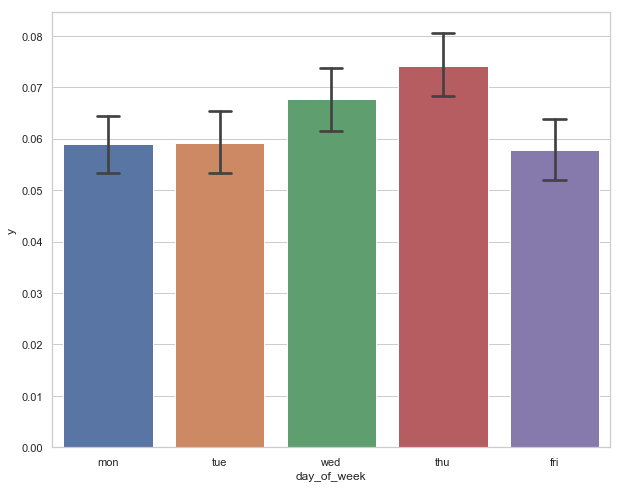

In [26]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="day_of_week", y="y", data=train_dataset, capsize=.2)

It can be observed from image above is that most of the term deposit were subscribed Thursdays.

Below is the bar plot for client subscribing a term deposit VS outcome of the previous marketing campaign:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


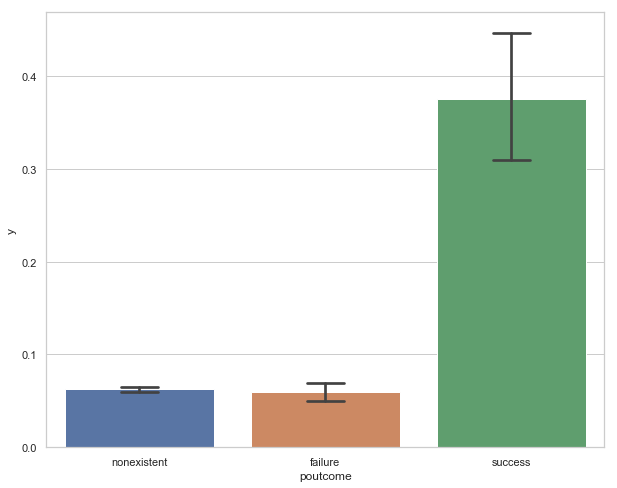

In [27]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="poutcome", y="y", data=train_dataset, capsize=.2)

In most cases, the outcome of the previous marketing campaign was success for those who subscribed to term deposit.

Below is the bar plot for client subscribing a term deposit VS Contact communication type:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


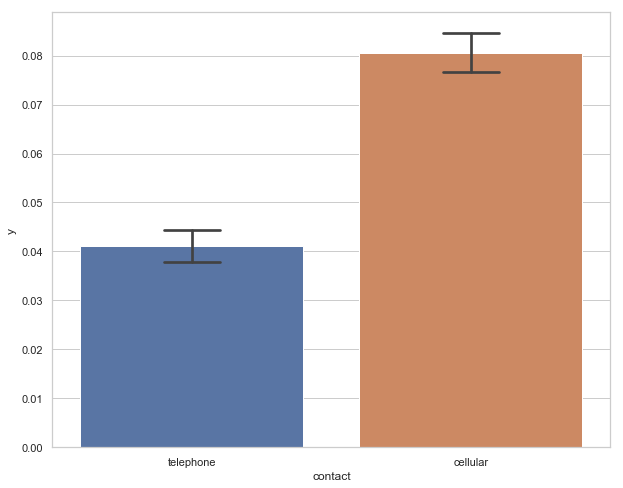

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="contact", y="y", data=train_dataset, capsize=.2)

It can be seen that most of the communication was cellular when a term deposit was subscribed.

## e) Preliminary observation

Below is the list of observations from the classification data provided.

Most clients who subscribed to the plan were:
- Elderly people (checked from age plot)
- when the number of contacts performed during this campaign and for this client was 1 (one)
- Students and retired clients
- Clients having no credit in default

Also, it was observed that most term-deposits were subscribed:
- in March and October months
- on Thursdays 
- when most of the communication was cellular.

Some other observations were also there and are listed above along with their plots.

# Method

Below are the methods used for classification:

**A. Pocket Algorithm**

To get an idea about the pocket algorithm, one should know about perceptrons. A linear model in which step function is applied on linear output is called perceptron.
Multiple iterations are performed to reduce the error in prediction by adjusting weights and it is depicted as below:

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

Pocket algorithm is a better version of perceptron algorithm as it compares new prediction with the previous best and retains the best value.

**Implementation of pocket algorithm:**

- Train Function: Input parameters required are training data X, actual output T, number of iterations and learning rate. Below is the algorithm:
    - - Initilize weights with 0 array.
	- - Copy values from w to w_pocket.
	- - Make a loop with number of iterations as argument in function
	- - Nested loop will check for convergence. Another inside loop runs whole dataset provided.
	- - Then prediction is done with the help of current weight.
	- - Then comparison is done with actual output.
	- - If predicted value is not matched, then weight is recalculated.
	- - Then compare Function is called.
	- - If convergence is achieved, return weights in w_pocket.
	    
- Use Function: Input parameters are input data X and weights w. It returns the dot product of input variables with weights, that is, predicted Value.

- Compare Function: It compares new prediction with the previous best and retains the best value in w_pocket.
    
**B. Logistic Model**
It is a model that predicts P(T=k∣x) when k is class label; given x is observation.
Direct prediction does not happen.
Depicted as below:

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

According to gradient descent, weights are updated using below formula: 


$$
\wv \leftarrow \wv - \alpha \nabla_\wv E(\wv).
$$

Softmax Function:

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

Finally weight is updated as below:


$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

**Implementation of Logistic Model:**
- Softmax Method: It has Z matrix as input variable and which is the dot product of input data X and the weights w. 
Softmax function is calculated on Z and prediction is returned.

- g() Method: It has input variables as X (input data matrix) and (weights) w. It provides the input to softmax by calculating the dot product.

- Train Method: 
	It has input variables as, X input data matrix, T output variables, the number of iterations and the learning rate. 
	Algorithm is below:
- - X is appended with a column of 1s in the beginning. 
- - w is initialized randomly between 0 and 1. 
- - Make a loop and predict values using g() function.
- - Calculate w and return w.

- Use Method: It has input variables as, X and w. Algorithm is as below:
- - Call g() to get some result.
- - np.argmax() function is used for predicting the value and return output.

**C. Discriminant Analysis**
It is used to determine the variables that discriminate between naturally occurring groups. It does group separation and prediction.
Bayes rule is used here:

$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)} \\
    \\
\end{align*}
$$

We have to calculate {P(X = x_i \mid T = k) P(T=k) and the Gaussian normal distribution will be used for the same as most data is normally distributed.

Methods of Discriminant Analysis are:

**1. Quadratic Discriminant Analysis:**

In this, separate covariance is calculated for each class. Decision boundary is quadratic for QDA. It is represented as below:

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

for a new sample $\tilde{\xv}$, prediction can be done using

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

#### Implementation
Train Method: It has 4 input variables namely, input data of the class, mean vector of the trained class, covariance matrix of the class, and the probability of the class in the training data. 
Discriminant is calculated as above and predicted output is returned.

**2. Linear Discriminant Analysis:**

Single covariance is used, that is why it is linear. It works better there is less data.
Below is the equation:

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

for a new sample $\tilde{\xv}$, prediction can be done using

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

#### Implementation
Train Method: It has 4 variables, X, mean vector of the trained class, covariance matrix of the whole training data, and probability of the class in the training data. Discriminant is calculated as above and predicted output is returned.

Assigning integer values to non-integer features:

In [29]:
complete_data['y'] = complete_data['y'].map({0 : 1, 1 : 2})
complete_data['job'] = complete_data['job'].map({'admin.' : 1, 'blue-collar' : 2, 'entrepreneur' : 3, 'housemaid' : 4,'management' : 5, 'retired' : 6,'self-employed' : 7, 'services' : 8, 'student' : 9, 'technician' : 10,'unemployed' : 11, 'unknown' : 12})
complete_data['marital'] = complete_data['marital'].map({'divorced' : 1, 'married' : 2,'single' : 3, 'unknown' : 4})
complete_data['education'] = complete_data['education'].map({'basic.4y' : 1, 'basic.6y' : 2, 'basic.9y' : 3, 'high.school' : 4,'illiterate' : 5, 'professional.course' : 6,'university.degree' : 7, 'unknown' : 8})
complete_data['default'] = complete_data['default'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
complete_data['housing'] = complete_data['housing'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
complete_data['loan'] = complete_data['loan'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
complete_data['contact'] = complete_data['contact'].map({'cellular' : 1, 'telephone' : 2})
complete_data['month'] = complete_data['month'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4,'may' : 5, 'jun' : 6,'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10,'nov' : 11, 'dec' : 12})
complete_data['day_of_week'] = complete_data['day_of_week'].map({'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4,'fri' : 5})
complete_data['poutcome'] = complete_data['poutcome'].map({'failure' : 1, 'nonexistent' : 2, 'success' : 3})

Splitting the dataset for applying algorithms on it

In [30]:
data_partitions=partition_data(complete_data)
train_dataset=data_partitions[0]
print("The Shape of train data set is",train_dataset.shape)
test_dataset=data_partitions[1]
test_dataset.shape
print("The Shape of train data set is",test_dataset.shape)

The Shape of train data set is (32950, 21)
The Shape of train data set is (8238, 21)


### A. Super Class Definition

In [31]:
import numpy as np
import abc
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [32]:
class PocketAlgo(Classifier): 
    """ 
        Pocket Algo class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        BaseModel.__init__(self)
        
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
            
    # train pocket model
    def train(self, X, T,maxiter,alpha):
      w = np.zeros(X.shape[1])
      w_pocket = np.copy(w)
      N = X.shape[0]
     # plt.plot(T)
      for i in range(maxiter):
          converged = True
          for k in np.random.permutation(N): # N is the range
              y = w @ X[k]
              if np.sign(y) != np.sign(T[k]):
                w += alpha * T[k] * X[k]
                converged = False
              if self.compare(X, T, w, w_pocket) > 0: 
                 w_pocket[:] = w[:]
        
          if converged:
             print("converged at ", i)
             break
      return w_pocket
    # Applying the model on X dataset
    def use(self, X,w):
        y=X @ w
        prediction=np.array([np.where(y > 0,1,0)])
        return prediction     

### C. QDA (Quadratic Discriminant Analysis)

In [33]:
class QDAAlgo(Classifier): 
    """ 
        QDA class 
        
    """
    def __init__(self):
        BaseModel.__init__(self)
            
    # train QDA model
    def train(self, X,mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    def use():
        return ;

### D. LDA (Linear Discriminant Analysis)

In [34]:
class LDAAlgo(Classifier): 
    """ 
        LDA Class       
    """
    def __init__(self):
        BaseModel.__init__(self)
            
    # training the model
    def train(self, X,mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)
    def use():
        return ;       

### E. Logistic Regression

In [35]:
class LogisticRegAlgo(Classifier): 
    """ 
        Logistic class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        BaseModel.__init__(self)
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w)
            
    def train(self, X, T,maxiter,alpha):
        N=X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X))
        w = np.random.rand(X1.shape[1], T.shape[1])
        for step in range(maxiter):
            # TODO: add training code here! 
            ys = self.g(X1, w)
            w += alpha * X1.T @ (T - ys)
        
        return w
   
    # applying model to dataset X
    def use(self, X,w):
        X1t = np.hstack((np.ones((X.shape[0],1)), X))
        Y = self.g(X1t, w)
        prediction=np.argmax(Y,1)
        return prediction

# Experiments

## Evaluation Metrics

To find the best model, accuracy needs to be calcuated. It helps to judge which model is the best. It helps to find the overall accuracy and is formulated as below:

$$
   \text{Accuracy} = \frac{\text{number of correct classification}}{\text{number of samples}}.
$$


#### Confusion Matrix

In confusion Matrix, each row represents the predictions from model and column represents the actual classes.
- <b>TP or True positives</b> are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
- <b>Tn or True negatives</b> are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False)
- <b>FP or False positives </b> are the cases when the actual class of the data point was 0(False) and the predicted is 1(True)
- <b>FN or False negatives</b> are the cases when the actual class of the data point was 1(True) and the predicted is 0(False)

Accuracy of a confusion matrix is calculated as: 

Accuracy = (TP+TN)/(TP+FP+TN+FN)

Metrics:

- Precision: It is the accuracy of positive predictions.

- Recall or Sensitivity:  It represents how well does the model cover the positive class.

- F1 Score: It is the harmonic mean of precision and recall as only one output is receive which is good for measuring.

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

### The ROC Curve
It plots TP vs FP.

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)

When the classification results are good, the curve gets closer to rectangular curve, close to 1 on the 0 FPR.

## Pocket Algo Implementation

In [36]:
def normalize(X):
       for i in range(X.shape[1]) :
           x_column = X[:,i]
           mu = x_column.mean() 
           std = x_column.std()
           X[:,i] = (x_column - mu) / std
       return X

Reshaping X and T taking some important features.

In [37]:
X=train_dataset.iloc[:,0:10]
result=train_dataset.iloc[:,20:21]

res_array=result['y']

res_array=res_array[:10000]
T1=np.zeros(len(res_array))
T2=np.zeros(len(res_array))

for i in range(len(res_array)):
    if(res_array[i] == 1):
        T1[i]=1
        T2[i]=-1
    elif(res_array[i] == 2):
        T1[i]=-1
        T2[i]=1
X1=X.values[:10000,:]
X1=normalize(X1)

print("Shape of X1",X1.shape)
print("Shape of T",T1.shape)

Shape of X1 (10000, 10)
Shape of T (10000,)


C:\Users\arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [38]:
unique, counts = np.unique(T1, return_counts=True)
print("Class1",dict(zip(unique, counts)))
unique, counts = np.unique(T2, return_counts=True)
print("Class2",dict(zip(unique, counts)))

Class1 {-1.0: 334, 1.0: 9666}
Class2 {-1.0: 9666, 1.0: 334}


In [39]:
print("starting for w1")
pa=PocketAlgo()
w1=pa.train(X1,T1,10,0.1)

print("starting for w2")
pa2=PocketAlgo()
w2=pa2.train(X1,T2,10,0.1)


starting for w1
starting for w2


In [40]:
pa10=PocketAlgo()
y1=pa10.use(X1,w1)
y2=pa10.use(X1,w2)
print("done with ys")

done with ys


In [41]:
z1=np.array([np.where(y1 > 0,1,0)])

unique, counts = np.unique(z1, return_counts=True)
print("y1",dict(zip(unique, counts)))

z2=np.array([np.where(y2 > 0,1,0)])

unique, counts = np.unique(z2, return_counts=True)
print("y2",dict(zip(unique, counts)))

y1 {1: 10000}
y2 {0: 10000}


Accuracy is as below:

In [42]:
print("Accuracy: ", (np.count_nonzero(T1==z1)/T1.shape[0]) * 100, "%")
#print("Accuracy: ", (np.count_nonzero(T2==z2)/T2.shape[0]) * 100, "%")

Accuracy:  96.66 %


classifier 1


(array([ 334.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9666.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

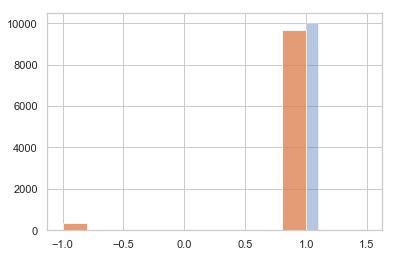

In [43]:
p1=z1.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 1")
plt.hist(T1,alpha=0.8)

Confusion Matrix accuracy is  96.66 %
F1 score is 0.4915081867181938


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


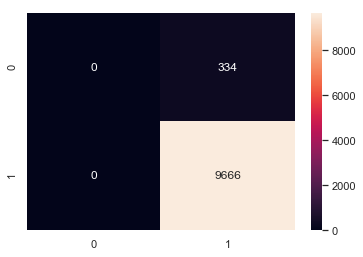

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z1.T[:,0]
cfm_QDA=confusion_matrix(T1, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T1, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

classifier 2


(array([9666.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         334.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

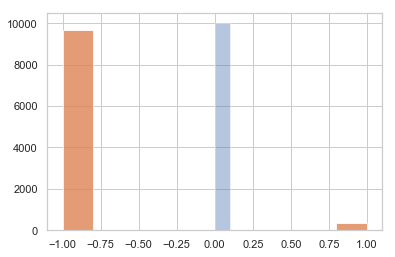

In [45]:
p1=z2.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 2")
plt.hist(T2,alpha=0.8)

Confusion Matrix accuracy is  0.0 %
F1 score is 0.0


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


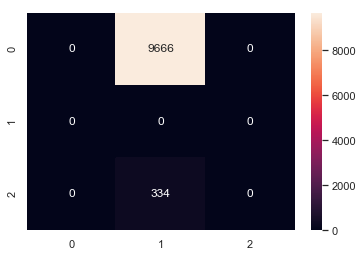

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z2.T[:,0]
cfm_QDA=confusion_matrix(T2, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T2, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

Applying the same on Test-Data

In [47]:
X_test=test_dataset.iloc[:,0:10]
result_test=test_dataset.iloc[:,20:21]

res_array_test=result_test['y'].values

T1_test=np.zeros(len(res_array_test))
T2_test=np.zeros(len(res_array_test))

for j in range(len(res_array_test)):
    if(res_array_test[j] == 1):
        T1_test[j]=1
        T2_test[j]=-1
    elif(res_array_test[j] == 2):
        T1_test[j]=-1
        T2_test[j]=1
X1_test=X_test.values
X1_test=normalize(X1_test)

print("Shape of X1",X1_test.shape)

Shape of X1 (8238, 10)


In [48]:
pa_test=PocketAlgo()
y1_test=pa_test.use(X1_test,w1)
y2_test=pa_test.use(X1_test,w2)

In [49]:
z1_test=np.array([np.where(y1_test > 0,1,0)])

unique, counts = np.unique(z1_test, return_counts=True)
print("y1_test",dict(zip(unique, counts)))

z2_test=np.array([np.where(y2_test > 0,1,0)])

unique, counts = np.unique(z2_test, return_counts=True)
print("y2_test",dict(zip(unique, counts)))

y1_test {0: 6070, 1: 2168}
y2_test {0: 1975, 1: 6263}


In [50]:
print("Accuracy: ", (np.count_nonzero(T1_test==z1_test)/T1_test.shape[0]) * 100, "%")
print("Accuracy: ", (np.count_nonzero(T2_test==z2_test)/T2_test.shape[0]) * 100, "%")

Accuracy:  18.693857732459335 %
Accuracy:  24.083515416363195 %


classifier 1


(array([2540.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5698.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

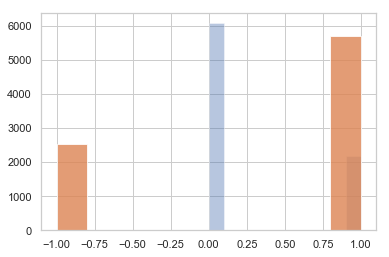

In [51]:
p1=z1_test.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 1")
plt.hist(T1_test,alpha=0.8)

Confusion Matrix accuracy is  18.693857732459335 %
F1 score is 0.1305195355538605


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


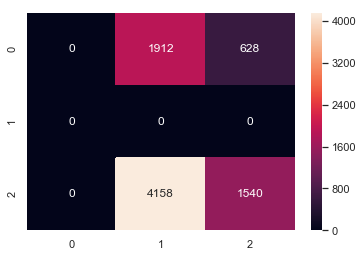

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z1_test.T[:,0]
cfm_QDA=confusion_matrix(T1_test, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T1_test, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

classifier 2


(array([5698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2540.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

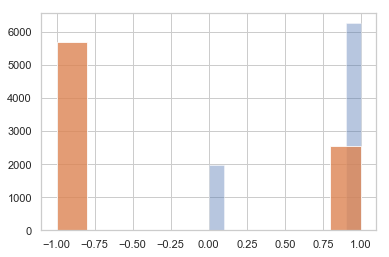

In [53]:
p1=z2_test.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 2")
plt.hist(T2_test,alpha=0.8)

Confusion Matrix accuracy is  24.083515416363195 %
F1 score is 0.15025180809572494


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


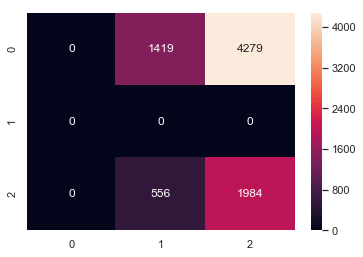

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z2_test.T[:,0]
cfm_QDA=confusion_matrix(T2_test, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T2_test, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

## QDA - Quadratic Discriminant Analysis

In [55]:
st1=train_dataset
class_1_data=st1[st1['y']== 1]
class_2_data=st1[st1['y']== 2]

In [56]:
class_2_data.shape

class_1_data=class_1_data.iloc[:,:10]
class_2_data=class_2_data.iloc[:,:10]

In [57]:
class_1_mu=class_1_data.mean(axis=0)
class_2_mu=class_2_data.mean(axis=0)

class_1_mu=class_1_mu[np.newaxis,:]
class_2_mu=class_2_mu[np.newaxis,:]

In [58]:

class_1_sigma=class_1_data.cov()
class_2_sigma=class_2_data.cov()

In [59]:
prior_1=(class_1_data.shape[0]/st1.shape[0])
prior_2=(class_2_data.shape[0]/st1.shape[0])
prior_1 + prior_2
# Sum should be 1

1.0

In [60]:
train_qda=train_dataset.iloc[:,:10].values
q2=QDAAlgo()

D1_train=q2.train(train_qda,class_1_mu,class_1_sigma,prior_1)
D2_train=q2.train(train_qda,class_2_mu,class_2_sigma,prior_2)


In [61]:
pred_train=np.vstack((D1_train,D2_train))
pred_train=pred_train.T

predFin_QDA_train=np.argmax(pred_train,1)
predFin_QDA_train=np.array(predFin_QDA_train) +1
T_QDA_train=train_dataset.iloc[:,20].values
cnt=np.count_nonzero(T_QDA_train==predFin_QDA_train)

print(cnt)
print("Accuracy: ", (np.count_nonzero(T_QDA_train==predFin_QDA_train)/T_QDA_train.shape[0]) * 100, "%")


30817
Accuracy:  93.52655538694992 %


(array([30850.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2100.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

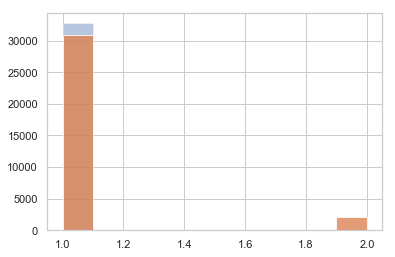

In [62]:
plt.hist(predFin_QDA_train,alpha=0.4)
plt.hist(T_QDA_train,alpha=0.8)

Confusion Matrix accuracy is  93.52655538694992 %
F1 score is 0.5201387214272493


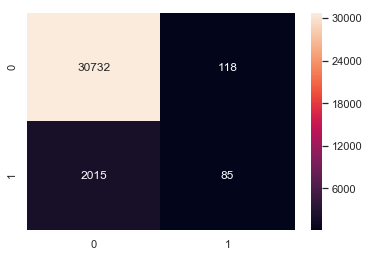

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
cfm_QDA_train=confusion_matrix(T_QDA_train, predFin_QDA_train)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_QDA_train, predFin_QDA_train, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x26f0a9de7f0>,
 [Text(-1.09979,0.0212891,'1'), Text(1.09979,-0.0212891,'2')])

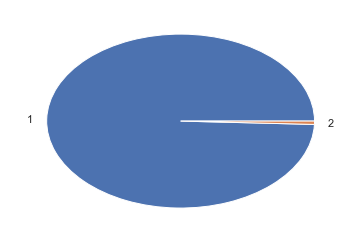

In [64]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_QDA_train, return_counts=True)
plt.pie(counts,labels=unique)

In [65]:
st2=test_dataset.iloc[:,:10].values
q2=QDAAlgo()
D1=q2.train(st2,class_1_mu,class_1_sigma,prior_1)
D2=q2.train(st2,class_2_mu,class_2_sigma,prior_2)

In [66]:
pred=np.vstack((D1,D2))

pred=pred.T
predFin_QDA=np.argmax(pred,1)
predFin_QDA=np.array(predFin_QDA) +1
T_QDA=test_dataset.iloc[:,20].values
cnt=np.count_nonzero(T_QDA==predFin_QDA)
print(cnt)
print("Accuracy: ", (np.count_nonzero(T_QDA==predFin_QDA)/T_QDA.shape[0]) * 100, "%")


5711
Accuracy:  69.32507890264628 %


(array([5698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2540.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

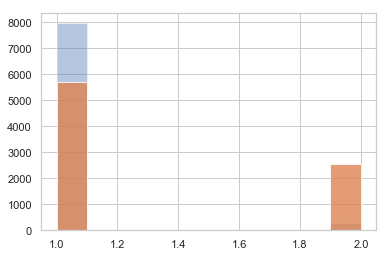

In [67]:
plt.hist(predFin_QDA,alpha=0.4)
plt.hist(T_QDA,alpha=0.8)

Confusion Matrix accuracy is  69.32507890264628 %
F1 score is 0.4577468345574046


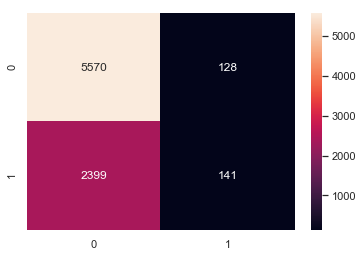

In [68]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(T_QDA, predFin_QDA)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_QDA, predFin_QDA, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x26f0a8b7d30>,
 [Text(-1.09422,0.112645,'1'), Text(1.09422,-0.112645,'2')])

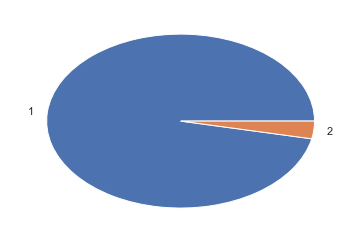

In [69]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_QDA, return_counts=True)
plt.pie(counts,labels=unique)

# LDA - Linear Discriminant Analysis

In [70]:
st1=train_dataset
class_1_data=st1[st1['y']== 1]
class_2_data=st1[st1['y']== 2]

In [71]:
class_2_data.shape
class_1_data=class_1_data.iloc[:,:20]
class_2_data=class_2_data.iloc[:,:20]

In [72]:
class_1_mu=class_1_data.mean(axis=0)
class_2_mu=class_2_data.mean(axis=0)
class_1_mu=class_1_mu[np.newaxis,:]
class_2_mu=class_2_mu[np.newaxis,:]

In [73]:
sigma=np.cov(st1.iloc[:,:20].values.T)

In [74]:
prior_1=(class_1_data.shape[0]/st1.shape[0])
prior_2=(class_2_data.shape[0]/st1.shape[0])
prior_1 + prior_2
# Sum should be 1

1.0

In [75]:
lda_train_data=train_dataset.iloc[:,:20].values
l2=LDAAlgo()

D1_train=l2.train(lda_train_data,class_1_mu,sigma,prior_1)
D2_train=l2.train(lda_train_data,class_2_mu,sigma,prior_2)

In [76]:
pred_train=np.vstack((D1_train,D2_train))

pred_train=pred_train.T
predFin_LDA_train=np.argmax(pred_train,1)
predFin_LDA_train=np.array(predFin_LDA_train) +1
T_LDA_train=train_dataset.iloc[:,20].values
cnt=np.count_nonzero(T_LDA_train==predFin_LDA_train)
cnt
print("Accuracy: ", (np.count_nonzero(T_LDA_train==predFin_LDA_train)/T_LDA_train.shape[0]) * 100, "%")

Accuracy:  93.62670713201821 %


(array([30850.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2100.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

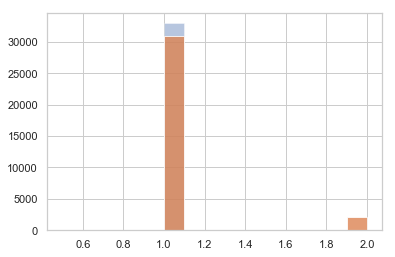

In [77]:
plt.hist(predFin_LDA_train,alpha=0.4)
plt.hist(T_LDA_train,alpha=0.8)

Confusion Matrix accuracy is  93.62670713201821 %
F1 score is 0.48354231974921624


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


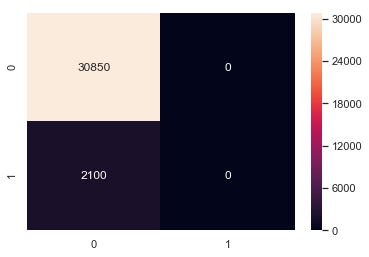

In [78]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(T_LDA_train, predFin_LDA_train)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_LDA_train, predFin_LDA_train, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x26f0bd22908>], [Text(-1.1,1.34711e-16,'1')])

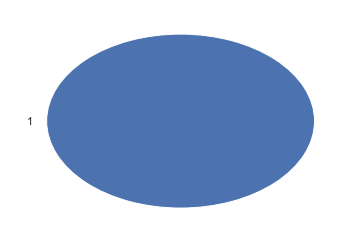

In [79]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_LDA_train, return_counts=True)
plt.pie(counts,labels=unique)

([<matplotlib.patches.Wedge at 0x26f0bd5b518>,
 [Text(-1.07802,0.218777,'1'), Text(1.07802,-0.218777,'2')])

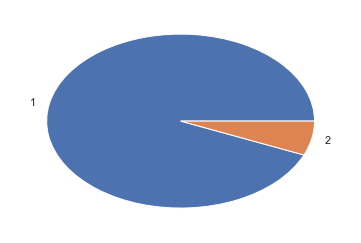

In [80]:
import matplotlib.pyplot as plt
unique, counts = np.unique(T_LDA_train, return_counts=True)
plt.pie(counts,labels=unique)

In [81]:
st2=test_dataset.iloc[:,:20].values
l2=LDAAlgo()


D1=l2.train(st2,class_1_mu,sigma,prior_1)
D2=l2.train(st2,class_2_mu,sigma,prior_2)


In [82]:
pred=np.vstack((D1,D2))

pred=pred.T
predFin_LDA=np.argmax(pred,1)
predFin_LDA=np.array(predFin_LDA) +1
T_LDA=test_dataset.iloc[:,20].values
cnt=np.count_nonzero(T_LDA==predFin_LDA)
cnt
print("Accuracy: ", (np.count_nonzero(T_LDA==predFin_LDA)/T_LDA.shape[0]) * 100, "%")


Accuracy:  69.16727361009953 %


(array([5698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2540.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

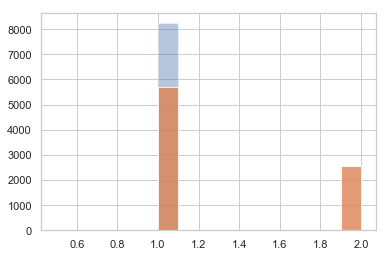

In [83]:
plt.hist(predFin_LDA,alpha=0.4)
plt.hist(T_LDA,alpha=0.8)

accuracy is  69.16727361009953 %
F1 score is 0.4088691159586682


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


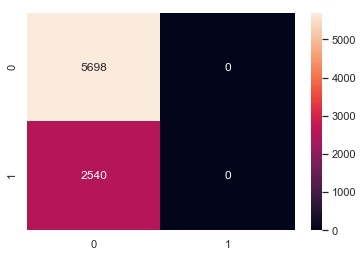

In [84]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(T_LDA, predFin_LDA)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_LDA, predFin_LDA, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x26f0c1738d0>], [Text(-1.1,1.34711e-16,'1')])

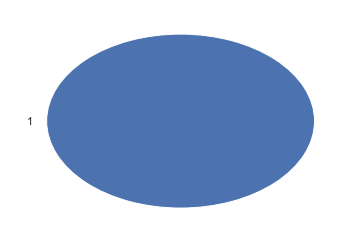

In [85]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_LDA, return_counts=True)
plt.pie(counts,labels=unique)

([<matplotlib.patches.Wedge at 0x26f0c1ab5c0>,
 [Text(-0.623064,0.906527,'1'), Text(0.623064,-0.906527,'2')])

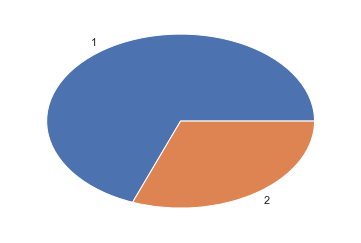

In [86]:
import matplotlib.pyplot as plt
unique, counts = np.unique(T_LDA, return_counts=True)
plt.pie(counts,labels=unique)

## Logistic Model

In [87]:
from sklearn import preprocessing
X=train_dataset.iloc[:,0:20]
result=train_dataset["y"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result = result.reshape(len(result),1)
T = onehot_encoder.fit_transform(result)
T.shape

(32950, 2)

In [88]:
def normalize(X):
       for i in range(X.shape[1]) :
           x_column = X[:,i]
           mu = x_column.mean() 
           std = x_column.std()
           X[:,i] = (x_column - mu) / std
       return X

In [89]:
# Taking 30k datarows
lgr=LogisticRegAlgo()
X_norm=np.copy(X)
X_train=X_norm[:30000,:]
T_train=T[:30000,:]
X_train=normalize(X_train)
X_train.shape
T_train.shape

(30000, 2)

In [90]:
w=lgr.train(X_train,T_train,10000,0.0001)
w

array([[ 2.27643628, -1.52291369],
       [ 0.67198644,  0.68461405],
       [ 0.77657945,  0.78540278],
       [ 0.7191616 ,  0.76806945],
       [ 0.48112322,  0.60056739],
       [ 0.58812802,  0.51028574],
       [ 0.77805573,  0.77410349],
       [ 0.58593682,  0.53128502],
       [ 0.3537925 ,  0.2509714 ],
       [ 2.395487  , -1.07537126],
       [ 0.60123847,  0.61760204],
       [ 0.10290327,  1.41544434],
       [ 0.51691731,  0.44465709],
       [ 0.35360695,  0.2969959 ],
       [ 0.5935469 ,  0.43438366],
       [ 0.75830891,  0.76852263],
       [ 4.83927572, -3.78034339],
       [ 1.31565116,  0.14588699],
       [ 0.56509549,  0.92091239],
       [-0.95565514,  2.40857184],
       [-2.88045824,  3.44082298]])

In [91]:
w1=lgr.train(X_train,T_train,10000,0.002)
w1

array([[ 1.37668999e+01, -1.27449840e+01],
       [-3.39598554e-01,  5.65726985e-01],
       [ 5.89434428e-01,  6.76103614e-01],
       [ 1.54408631e-02,  2.75941221e-01],
       [-9.09827006e-02,  5.46153623e-01],
       [ 8.35188291e-01,  1.53970429e-01],
       [ 7.83910677e-01,  8.96119068e-01],
       [ 7.75057681e-01,  5.88316590e-01],
       [ 6.96076603e-01, -1.42859280e-01],
       [ 1.39487775e+01, -1.34843459e+01],
       [ 6.84181761e-01,  9.18956031e-01],
       [-1.68146718e+00,  2.55770269e+00],
       [ 9.84597502e-01, -5.70789791e-02],
       [ 7.74998043e-01, -2.14709386e-01],
       [ 1.02297833e+00, -5.11673874e-01],
       [ 1.06122595e+00,  1.80055350e-01],
       [ 3.17042682e+01, -3.06217580e+01],
       [ 7.67790495e+00, -6.79238955e+00],
       [ 1.93020998e+00, -1.66493874e+00],
       [-2.25815072e+01,  2.37110384e+01],
       [-1.49674759e+01,  1.62993372e+01]])

In [92]:
w2=lgr.train(X_train,T_train,10000,0.001)
w2

array([[  6.38371876,  -5.23134062],
       [  0.51948466,   0.78429662],
       [  0.795788  ,   0.76079709],
       [  0.58656861,   0.75050935],
       [  0.40134435,   0.8364282 ],
       [  0.83586295,   0.53960874],
       [  0.3782629 ,   0.38643923],
       [  0.58478282,   0.42624232],
       [  0.7477674 ,  -0.38092064],
       [  7.1897243 ,  -6.6594707 ],
       [  0.24795737,   0.40845197],
       [ -0.40136279,   1.6534534 ],
       [  0.90526731,   0.3328864 ],
       [  0.59280318,   0.1120117 ],
       [  0.66954591,   0.068461  ],
       [  0.77742223,   0.12423909],
       [ 16.63740558, -15.41377303],
       [  4.16427753,  -2.94674783],
       [  1.58577821,   0.21598609],
       [-10.51186989,  11.15207905],
       [ -7.50316452,   8.651082  ]])

Accuracy:  94.86 %


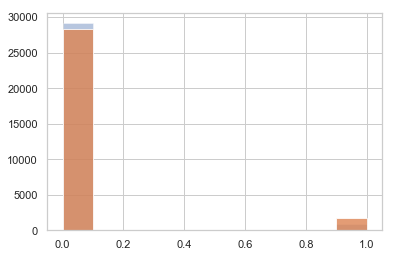

In [93]:
predicted=lgr.use(X_train,w)
plt.hist(predicted,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  94.86 %
F1 score is 0.6872723158581517


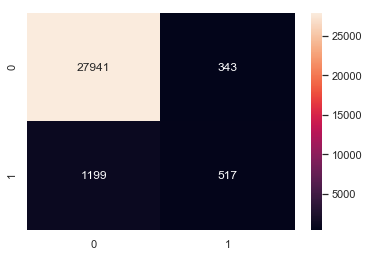

In [94]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  94.3 %


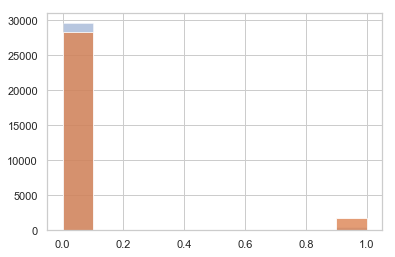

In [95]:
predicted1=lgr.use(X_train,w1)
plt.hist(predicted1,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted1)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  94.3 %
F1 score is 0.5841930998814536


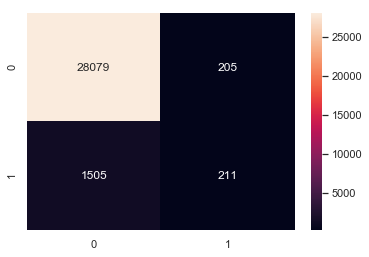

In [96]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  94.23 %


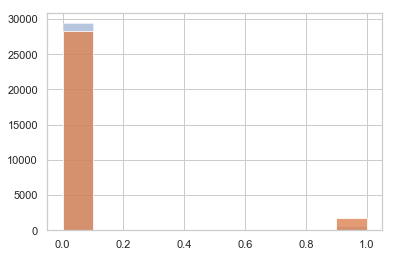

In [97]:
predicted2=lgr.use(X_train,w2)
plt.hist(predicted2,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted2)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  94.23 %
F1 score is 0.6124154562088391


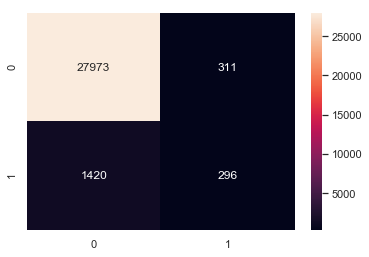

In [98]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Applying on test data

In [99]:
#Test Data Set
from sklearn import preprocessing
X_test=test_dataset.iloc[:,:20]
result_test=test_dataset["y"].values

onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result_test = result_test.reshape(len(result_test),1)
T_test = onehot_encoder.fit_transform(result_test)
T_test.shape
lgr_test=LogisticRegAlgo()
X_norm_test=np.copy(X_test)
X1_test=X_norm_test[:,:]
X1_test=normalize(X1_test)

Accuracy:  31.45180869142996 %


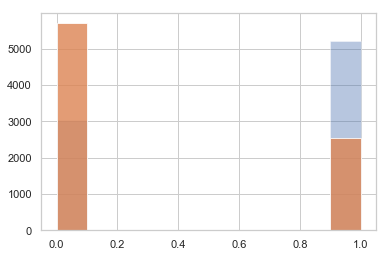

In [100]:
predicted_test=lgr_test.use(X1_test,w)
plt.hist(predicted_test,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  31.45180869142996 %
F1 score is 0.31209425175166483


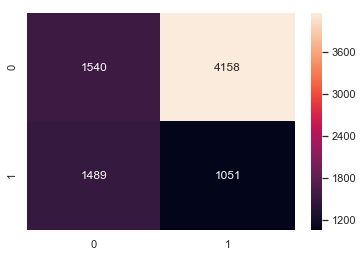

In [101]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  31.731002670551106 %


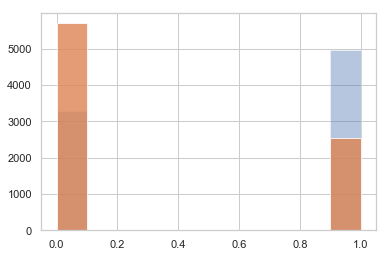

In [102]:
predicted_test1=lgr_test.use(X1_test,w1)
plt.hist(predicted_test1,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test1)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  31.731002670551106 %
F1 score is 0.31178680926916225


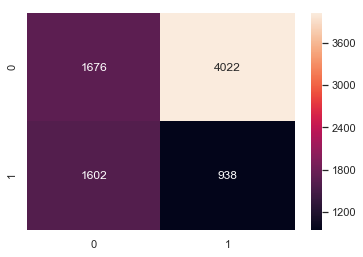

In [103]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  31.34255887351299 %


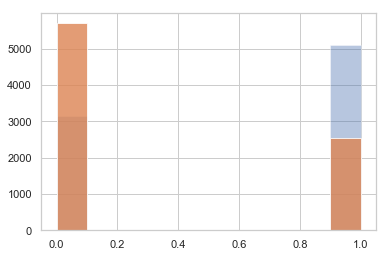

In [104]:
predicted_test2=lgr_test.use(X1_test,w2)
plt.hist(predicted_test2,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test2)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  31.34255887351299 %
F1 score is 0.30966528177354824


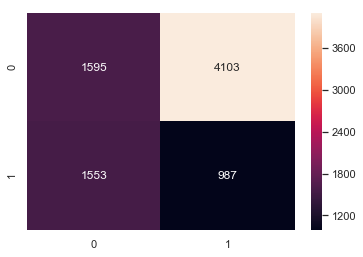

In [105]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

## Accuracy Table
<table style="width:90%">
  <tr>
    <th>Algorithm</th>
    <th>Training Performance</th> 
    <th>Test Performance</th>
  </tr>
  <tr>
    <td>QDA (Quadratic Discriminant Analysis)</td>
    <td>93.52%, F1=0.52</td> 
    <td>69.32%, F1=0.45</td>
  </tr>
    <tr>
    <td>LDA (Linear Discriminant Analysis)</td>
    <td>93.62%, F1=0.48</td> 
    <td>69.16%, F1=0.40</td>
  </tr>
    <tr>
    <td>Logistic Model </td>
    <td>94.70%, F1=0.67</td> 
    <td>62.39%, F1=0.52</td>
  </tr>
    <tr>
    <td>Pocket Algorithm</td>
    <td>classifier1:  96.66 % 
			</td> 
    <td>classifier1:  11.31 %,
		classifier2:  21.65 %
	</td>
  </tr>
</table>

## Comparision of All Classification Models
Below are some observations from above code:
- Slowest Algorithm - Pocket Algo
- For the best fit of the model, the number of iterations should be more. (Pocket and Logistic regression)
- Pocket algo is dependent on learning factor.
- Logistic Algo is dependent on learning factor.
- LDA, QDA and logistic have similar accuracy. 
- Logistic Algo have highest training performance accuracy.
- Worst test performance is of pocket algorithm.


# CONCLUSION

It would like to conclude by stating that this was a very interesting assignment. I learnt a lot about classification of dataset. 
Overall, the subject Machine Learning is quite fascinating, in the way that machine gets the ability to think on its own on the basis of provided algorithms and datasets and predict or fetch some result.
Challenges that I have faced was in coding the algorithms, but I learnt it from various websites and was successfully able to complete all the tasks.

About 80% of the time was of the data scientists is usually spent in fetching and cleaning the data, which is known as data preprocessing and data scientists spend lesser time (20%) on actual working on data, that is, applying the algorithms to visualize it. 
To visualize the data, I got to know about some more python libraries which I did not know before.

Confusion matrix gives better insights about the model perfomance.
Logistic Algo gave highest training performance and test performance accuracy.

**Suggestion as requested in assignment:**

This assignment was pretty tough to code. Took most of the time. Felt like never take this ML course with 3 other courses.

# REFERENCES
[1] S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing", Decision Support Systems, Elsevier, 62:22-31, June 2014, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[2] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[3] "Statistical classification”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Statistical_classification

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

[7] Janio, "Melbourne || Comprehensive Housing Market Analysis", Kaggle, Data Repository, https://www.kaggle.com/janiobachmann/melbourne-comprehensive-housing-market-analysis

[8] Jake VanderPlas, "Multiple Subplots", Python Data Science Handbook, https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

[9] Hack-R, Stack Overflow, "Pandas: ValueError: cannot convert float NaN to integer"(2018) , https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer?rq=1

[10] P.Madan, "Machine Learning", Github, Repository, https://github.com/prashantmadaan

[11] DanB, "Handling Missing Values", Kaggle, Data Repository, https://www.kaggle.com/dansbecker/handling-missing-values

[12] Discriminant-Function-Analysis(Textbook), "Discover Which Variables Discriminate Between Groups, Discriminant Function Analysis", www.statsoft.com/Textbook/Discriminant-Function-Analysis

[13] Mohammed Sunasra, "Performance Metrics for Classification problems in Machine Learning", Thalus, Medium(2017), https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

## Grammar and Spelling errors

Proofread by Grammarly

# EXTRA CREDIT
### Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.

In [106]:
def partition_data(X, ratio=[0.2, 0.2,0.2,0.2,0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

In [107]:
data_partitions=partition_data(complete_data)
train_dataset_0=data_partitions[0]
train_dataset_1=data_partitions[1]
train_dataset_2=data_partitions[2]
train_dataset_3=data_partitions[3]
test_dataset=data_partitions[4]
test_dataset.shape
print("The Shape of train data set is",train_dataset_0.shape , train_dataset_1.shape, train_dataset_2.shape,train_dataset_3.shape)
print("The Shape of train data set is",test_dataset.shape)

The Shape of train data set is (8238, 21) (8238, 21) (8238, 21) (8238, 21)
The Shape of train data set is (8236, 21)


### Pocket - for train data set 1

In [108]:
def normalize(X):
       for i in range(X.shape[1]) :
           x_column = X[:,i]
           mu = x_column.mean() 
           std = x_column.std()
           X[:,i] = (x_column - mu) / std
       return X

In [109]:
X=train_dataset_0.iloc[:,0:10]
result=train_dataset_0.iloc[:,20:21]

res_array=result['y']

res_array=res_array[:]
T1=np.zeros(len(res_array))
T2=np.zeros(len(res_array))

for i in range(len(res_array)):
    if(res_array[i] == 1):
        T1[i]=1
        T2[i]=-1
    elif(res_array[i] == 2):
        T1[i]=-1
        T2[i]=1
X1=X.values[:,:]
X1=normalize(X1)

print("Shape of X1",X1.shape)
print("Shape of T",T1.shape)

Shape of X1 (8238, 10)
Shape of T (8238,)


C:\Users\arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [110]:
unique, counts = np.unique(T1, return_counts=True)
print("Class1",dict(zip(unique, counts)))
unique, counts = np.unique(T2, return_counts=True)
print("Class2",dict(zip(unique, counts)))

Class1 {-1.0: 259, 1.0: 7979}
Class2 {-1.0: 7979, 1.0: 259}


In [111]:
print("starting for w1")
pa=PocketAlgo()
w1=pa.train(X1,T1,10,0.1)

print("starting for w2")
pa2=PocketAlgo()
w2=pa2.train(X1,T2,10,0.1)


starting for w1
starting for w2


In [112]:
pa10=PocketAlgo()
y1=pa10.use(X1,w1)
y2=pa10.use(X1,w2)
print("done with ys")

done with ys


In [113]:
z1=np.array([np.where(y1 > 0,1,0)])

unique, counts = np.unique(z1, return_counts=True)
print("y1",dict(zip(unique, counts)))

z2=np.array([np.where(y2 > 0,1,0)])

unique, counts = np.unique(z2, return_counts=True)
print("y2",dict(zip(unique, counts)))

y1 {1: 8238}
y2 {0: 8238}


In [114]:
print("Accuracy: ", (np.count_nonzero(T1==z1)/T1.shape[0]) * 100, "%")
#print("Accuracy: ", (np.count_nonzero(T2==z2)/T2.shape[0]) * 100, "%")

Accuracy:  96.85603301772275 %


classifier 1


(array([ 259.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7979.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

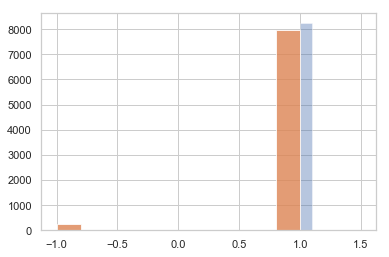

In [115]:
p1=z1.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 1")
plt.hist(T1,alpha=0.8)

Confusion Matrix accuracy is  96.85603301772275 %
F1 score is 0.49201455262995625


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


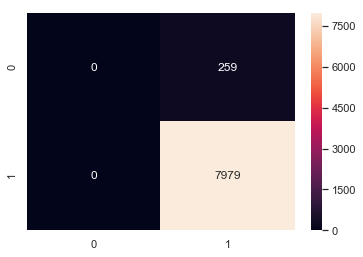

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z1.T[:,0]
cfm_QDA=confusion_matrix(T1, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T1, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

classifier 2


(array([7979.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         259.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

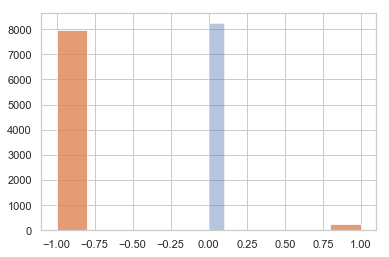

In [117]:
p1=z2.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 2")
plt.hist(T2,alpha=0.8)

Confusion Matrix accuracy is  0.0 %
F1 score is 0.0


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


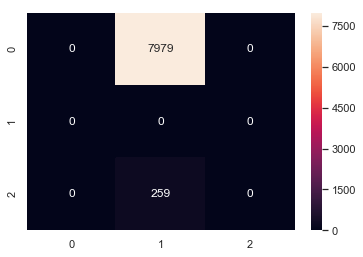

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z2.T[:,0]
cfm_QDA=confusion_matrix(T2, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T2, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

Testing

In [119]:
X_test=test_dataset.iloc[:,0:10]
result_test=test_dataset.iloc[:,20:21]

res_array_test=result_test['y'].values

T1_test=np.zeros(len(res_array_test))
T2_test=np.zeros(len(res_array_test))

for j in range(len(res_array_test)):
    if(res_array_test[j] == 1):
        T1_test[j]=1
        T2_test[j]=-1
    elif(res_array_test[j] == 2):
        T1_test[j]=-1
        T2_test[j]=1
X1_test=X_test.values
X1_test=normalize(X1_test)

print("Shape of X1",X1_test.shape)

Shape of X1 (8236, 10)


In [120]:
pa_test=PocketAlgo()
y1_test=pa_test.use(X1_test,w1)
y2_test=pa_test.use(X1_test,w2)

In [121]:
z1_test=np.array([np.where(y1_test > 0,1,0)])

unique, counts = np.unique(z1_test, return_counts=True)
print("y1_test",dict(zip(unique, counts)))

z2_test=np.array([np.where(y2_test > 0,1,0)])

unique, counts = np.unique(z2_test, return_counts=True)
print("y2_test",dict(zip(unique, counts)))

y1_test {0: 6624, 1: 1612}
y2_test {0: 1512, 1: 6724}


In [122]:
print("Accuracy: ", (np.count_nonzero(T1_test==z1_test)/T1_test.shape[0]) * 100, "%")
print("Accuracy: ", (np.count_nonzero(T2_test==z2_test)/T2_test.shape[0]) * 100, "%")

Accuracy:  12.9917435648373 %
Accuracy:  25.485672656629433 %


classifier 1


(array([2540.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5696.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

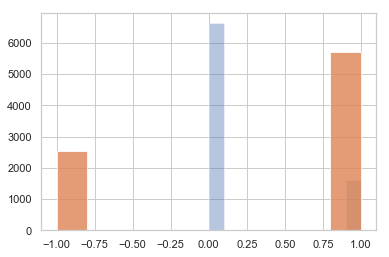

In [123]:
p1=z1_test.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 1")
plt.hist(T1_test,alpha=0.8)

Confusion Matrix accuracy is  12.9917435648373 %
F1 score is 0.0976099251961321


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


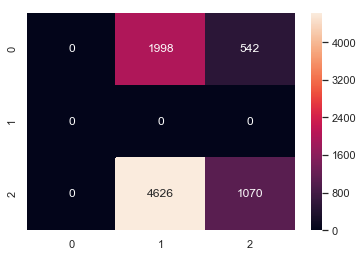

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z1_test.T[:,0]
cfm_QDA=confusion_matrix(T1_test, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T1_test, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

classifier 2


(array([5696.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2540.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

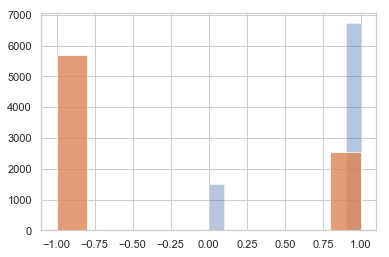

In [125]:
p1=z2_test.T[:,0]
plt.hist(p1,alpha=0.4)
print("classifier 2")
plt.hist(T2_test,alpha=0.8)

Confusion Matrix accuracy is  25.485672656629433 %
F1 score is 0.15105066206102477


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


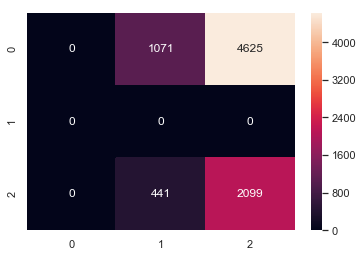

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
p1=z2_test.T[:,0]
cfm_QDA=confusion_matrix(T2_test, p1)
acc=cfm_QDA.diagonal().sum()/cfm_QDA.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T2_test, p1, average='macro'))
sns.heatmap(cfm_QDA,annot = True, fmt="d")

## Logistic Model For Train Dataset 1

In [127]:
from sklearn import preprocessing
X=train_dataset_0.iloc[:,0:20]
result=train_dataset_0["y"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result = result.reshape(len(result),1)
T = onehot_encoder.fit_transform(result)
T.shape

(8238, 2)

In [128]:
def normalize(X):
       for i in range(X.shape[1]) :
           x_column = X[:,i]
           mu = x_column.mean() 
           std = x_column.std()
           X[:,i] = (x_column - mu) / std
       return X

In [129]:

lgr=LogisticRegAlgo()
X_norm=np.copy(X)
X_train=X_norm[:,:]
T_train=T[:,:]
X_train=normalize(X_train)
X_train.shape
T_train.shape

C:\Users\arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(8238, 2)

In [130]:
w=lgr.train(X_train,T_train,8238,0.0001)


In [131]:
w1=lgr.train(X_train,T_train,8238,0.002)

In [132]:
w2=lgr.train(X_train,T_train,8238,0.001)


Accuracy:  96.85603301772275 %


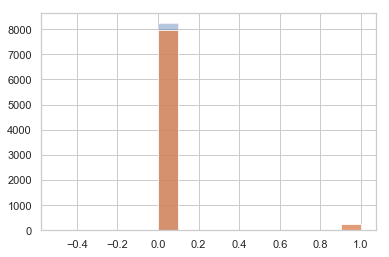

In [133]:
predicted=lgr.use(X_train,w)
plt.hist(predicted,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  96.85603301772275 %
F1 score is 0.49201455262995625


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


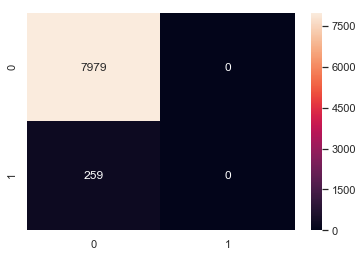

In [134]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  96.85603301772275 %


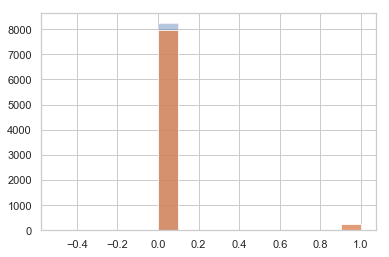

In [135]:
predicted1=lgr.use(X_train,w1)
plt.hist(predicted1,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted1)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  96.85603301772275 %
F1 score is 0.49201455262995625


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


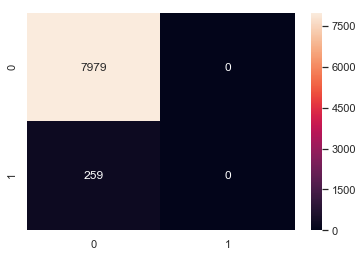

In [136]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  96.85603301772275 %


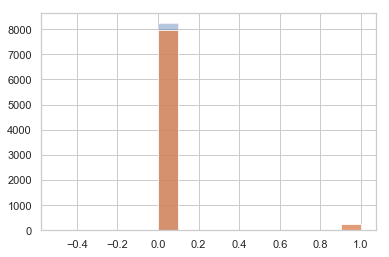

In [137]:
predicted2=lgr.use(X_train,w2)
plt.hist(predicted2,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted2)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  96.85603301772275 %
F1 score is 0.49201455262995625


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


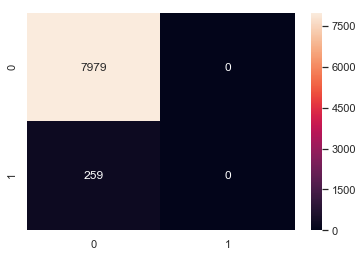

In [138]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

In [139]:
#Test Data Set
from sklearn import preprocessing
X_test=test_dataset.iloc[:,:20]
result_test=test_dataset["y"].values

onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result_test = result_test.reshape(len(result_test),1)
T_test = onehot_encoder.fit_transform(result_test)
T_test.shape
lgr_test=LogisticRegAlgo()
X_norm_test=np.copy(X_test)
X1_test=X_norm_test[:,:]
X1_test=normalize(X1_test)

Accuracy:  69.15978630403107 %


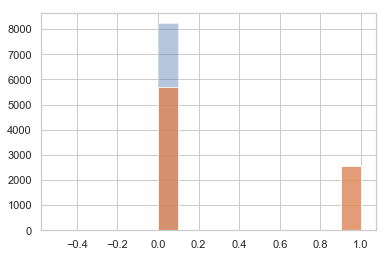

In [140]:
predicted_test=lgr_test.use(X1_test,w)
plt.hist(predicted_test,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  69.15978630403107 %
F1 score is 0.4088429514786104


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


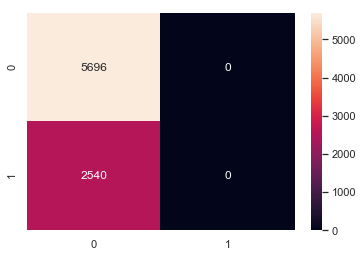

In [141]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  69.15978630403107 %


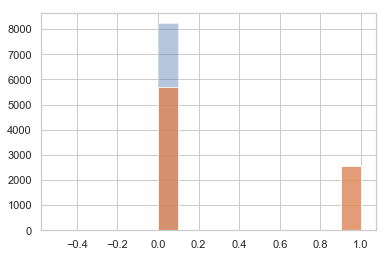

In [142]:
predicted_test1=lgr_test.use(X1_test,w1)
plt.hist(predicted_test1,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test1)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  69.15978630403107 %
F1 score is 0.4088429514786104


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


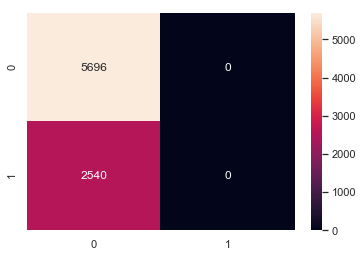

In [143]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")


Accuracy:  69.15978630403107 %


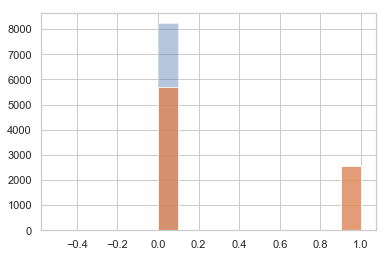

In [144]:
predicted_test2=lgr_test.use(X1_test,w2)
plt.hist(predicted_test2,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test2)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  69.15978630403107 %
F1 score is 0.4088429514786104


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


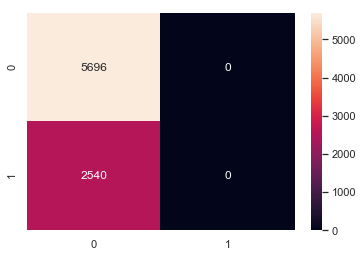

In [145]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

### Logistic for dataset 2

In [146]:
from sklearn import preprocessing
X=train_dataset_1.iloc[:,0:20]
result=train_dataset_1["y"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result = result.reshape(len(result),1)
T = onehot_encoder.fit_transform(result)
T.shape

(8238, 2)

In [147]:

lgr=LogisticRegAlgo()
X_norm=np.copy(X)
X_train=X_norm[:8238,:]
T_train=T[:8238,:]
X_train=normalize(X_train)
X_train.shape
T_train.shape

C:\Users\arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(8238, 2)

In [148]:
w=lgr.train(X_train,T_train,8238,0.0001)
w1=lgr.train(X_train,T_train,8238,0.002)
w2=lgr.train(X_train,T_train,8238,0.001)

Accuracy:  94.57392571012382 %


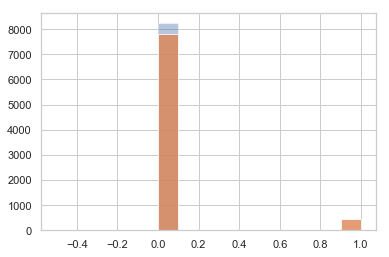

In [149]:
predicted=lgr.use(X_train,w)
plt.hist(predicted,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  94.57392571012382 %
F1 score is 0.4860565225528729


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


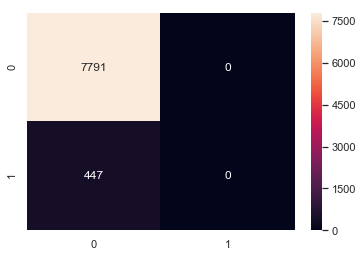

In [150]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  94.57392571012382 %


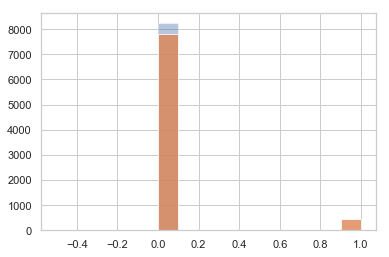

In [151]:
predicted1=lgr.use(X_train,w1)
plt.hist(predicted1,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted1)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  94.57392571012382 %
F1 score is 0.4860565225528729


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


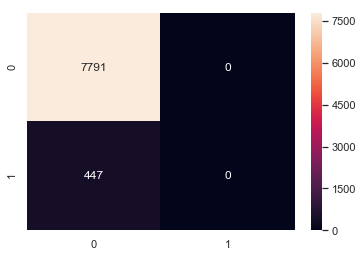

In [152]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  94.57392571012382 %


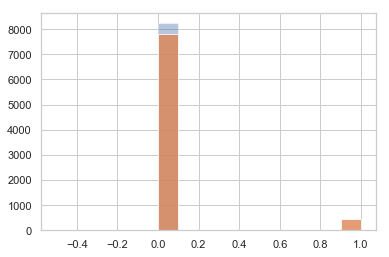

In [153]:
predicted2=lgr.use(X_train,w2)
plt.hist(predicted2,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted2)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  94.57392571012382 %
F1 score is 0.4860565225528729


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


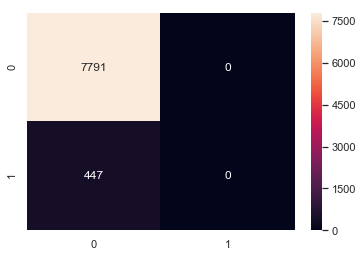

In [154]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

In [155]:
#Test Data Set
from sklearn import preprocessing
X_test=test_dataset.iloc[:,:20]
result_test=test_dataset["y"].values

onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result_test = result_test.reshape(len(result_test),1)
T_test = onehot_encoder.fit_transform(result_test)
T_test.shape
lgr_test=LogisticRegAlgo()
X_norm_test=np.copy(X_test)
X1_test=X_norm_test[:,:]
X1_test=normalize(X1_test)

Accuracy:  69.15978630403107 %


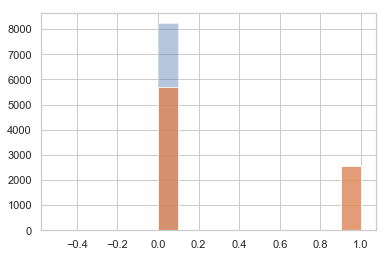

In [156]:
predicted_test=lgr_test.use(X1_test,w)
plt.hist(predicted_test,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  69.15978630403107 %
F1 score is 0.4088429514786104


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


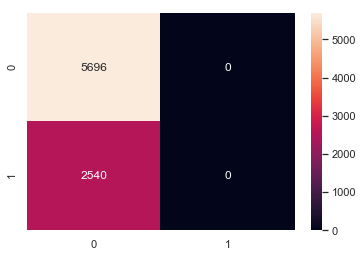

In [157]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  69.15978630403107 %


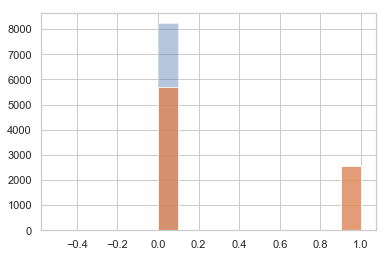

In [158]:
predicted_test1=lgr_test.use(X1_test,w1)
plt.hist(predicted_test1,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test1)/T_test.shape[0]) * 100, "%")


 Confusion Matrix accuracy is  69.15978630403107 %
F1 score is 0.4088429514786104


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


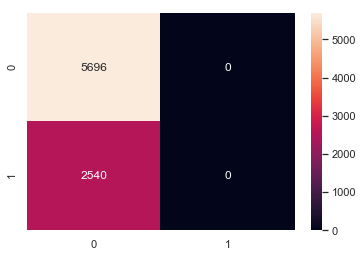

In [159]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  69.15978630403107 %


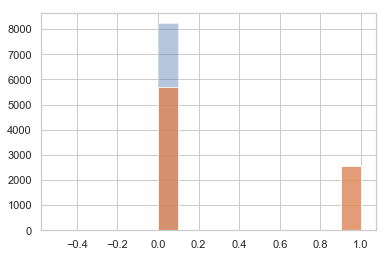

In [160]:
predicted_test2=lgr_test.use(X1_test,w2)
plt.hist(predicted_test2,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test2)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  69.15978630403107 %
F1 score is 0.4088429514786104


C:\Users\arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


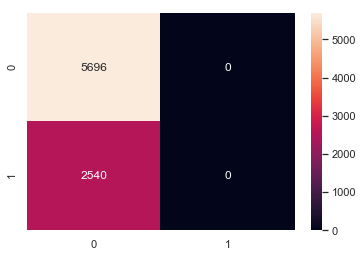

In [161]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

### Logistic for dataset 3

In [162]:
from sklearn import preprocessing
X=train_dataset_2.iloc[:,0:20]
result=train_dataset_2["y"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result = result.reshape(len(result),1)
T = onehot_encoder.fit_transform(result)
T.shape

(8238, 2)

In [163]:

lgr=LogisticRegAlgo()
X_norm=np.copy(X)
X_train=X_norm[:8238,:]
T_train=T[:8238,:]
X_train=normalize(X_train)
X_train.shape
T_train.shape

(8238, 2)

In [164]:
w=lgr.train(X_train,T_train,8238,0.0001)
w1=lgr.train(X_train,T_train,8238,0.002)
w2=lgr.train(X_train,T_train,8238,0.001)

Accuracy:  95.22942461762564 %


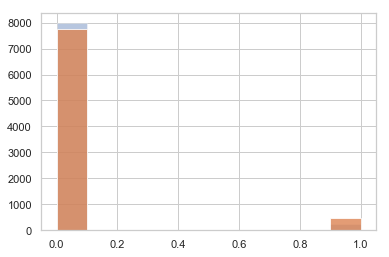

In [165]:
predicted=lgr.use(X_train,w)
plt.hist(predicted,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  95.22942461762564 %
F1 score is 0.7230419571416314


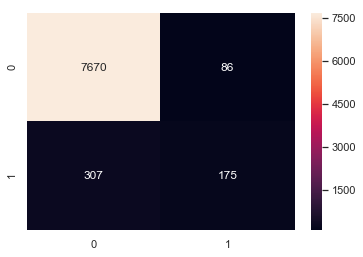

In [166]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  95.30225782957028 %


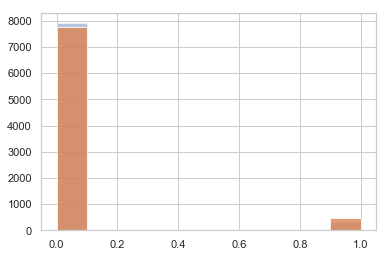

In [167]:
predicted1=lgr.use(X_train,w1)
plt.hist(predicted1,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted1)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  95.30225782957028 %
F1 score is 0.7502211542642561


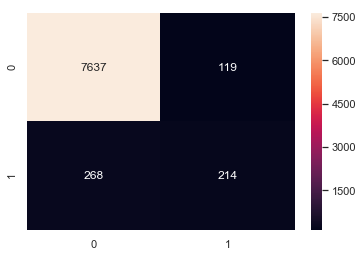

In [168]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  95.0716193250789 %


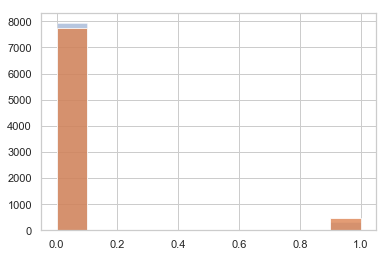

In [169]:
predicted2=lgr.use(X_train,w2)
plt.hist(predicted2,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted2)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  95.0716193250789 %
F1 score is 0.7313877162509151


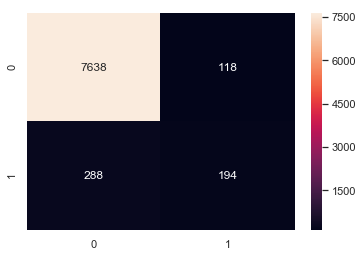

In [170]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

In [171]:
#Test Data Set
from sklearn import preprocessing
X_test=test_dataset.iloc[:,:20]
result_test=test_dataset["y"].values

onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result_test = result_test.reshape(len(result_test),1)
T_test = onehot_encoder.fit_transform(result_test)
T_test.shape
lgr_test=LogisticRegAlgo()
X_norm_test=np.copy(X_test)
X1_test=X_norm_test[:,:]
X1_test=normalize(X1_test)

Accuracy:  70.0461389023798 %


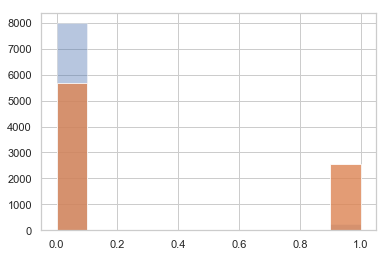

In [172]:
predicted_test=lgr_test.use(X1_test,w)
plt.hist(predicted_test,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  70.0461389023798 %
F1 score is 0.4678821740319311


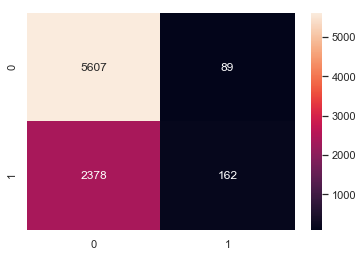

In [173]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  70.2525497814473 %


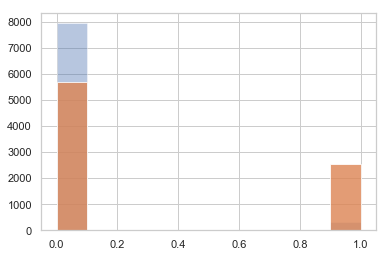

In [174]:
predicted_test1=lgr_test.use(X1_test,w1)
plt.hist(predicted_test1,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test1)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  70.2525497814473 %
F1 score is 0.47879988262910794


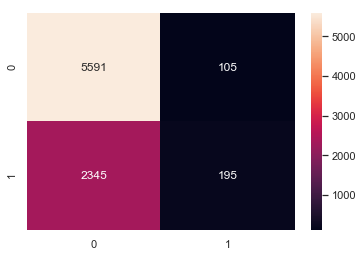

In [175]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  70.71393880524526 %


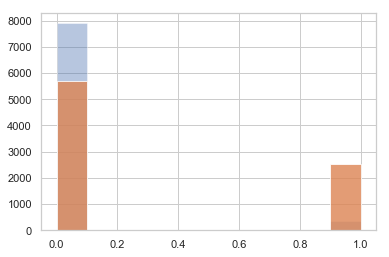

In [176]:
predicted_test2=lgr_test.use(X1_test,w2)
plt.hist(predicted_test2,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test2)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  70.71393880524526 %
F1 score is 0.4919650343040434


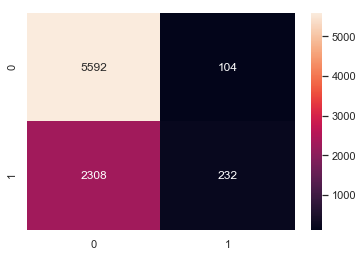

In [177]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

### Logistic for dataset 4

In [178]:
from sklearn import preprocessing
X=train_dataset_3.iloc[:,0:20]
result=train_dataset_3["y"].values
onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result = result.reshape(len(result),1)
T = onehot_encoder.fit_transform(result)
T.shape

(8238, 2)

In [179]:

lgr=LogisticRegAlgo()
X_norm=np.copy(X)
X_train=X_norm[:8238,:]
T_train=T[:8238,:]
X_train=normalize(X_train)
X_train.shape
T_train.shape

(8238, 2)

In [180]:
w=lgr.train(X_train,T_train,8238,0.0001)
w1=lgr.train(X_train,T_train,8238,0.002)
w2=lgr.train(X_train,T_train,8238,0.001)

Accuracy:  90.0825443068706 %


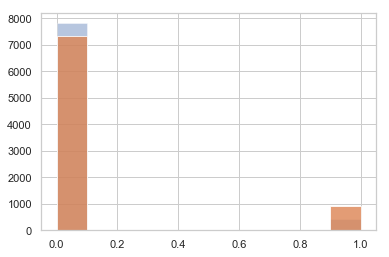

In [181]:
predicted=lgr.use(X_train,w)
plt.hist(predicted,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  90.0825443068706 %
F1 score is 0.6656569978395322


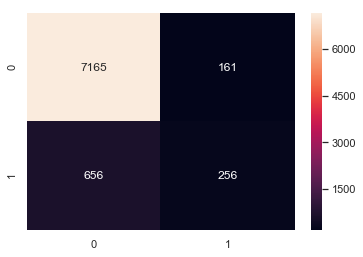

In [182]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  56.48215586307356 %


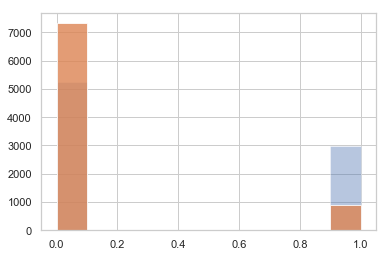

In [183]:
predicted1=lgr.use(X_train,w1)
plt.hist(predicted1,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted1)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  56.48215586307356 %
F1 score is 0.3966757630711283


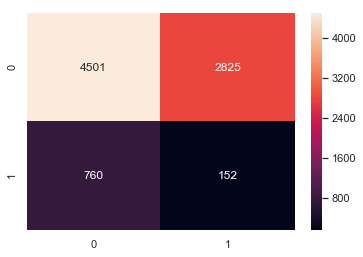

In [184]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  89.88832240835154 %


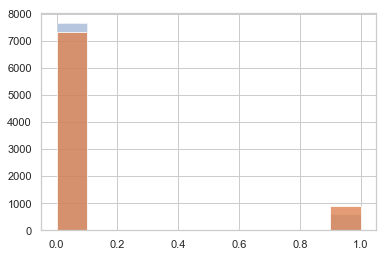

In [185]:
predicted2=lgr.use(X_train,w2)
plt.hist(predicted2,alpha=0.4)
plt.hist(np.argmax(T_train,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_train,1)==predicted2)/T_train.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  89.88832240835154 %
F1 score is 0.6954353610779289


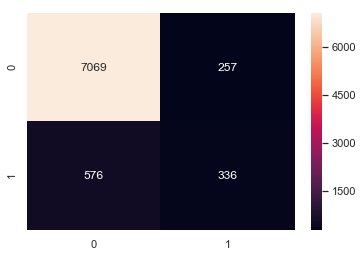

In [186]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_train,1), predicted2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_train,1), predicted2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

In [187]:
#Test Data Set
from sklearn import preprocessing
X_test=test_dataset.iloc[:,:20]
result_test=test_dataset["y"].values

onehot_encoder = preprocessing.OneHotEncoder(sparse = False)
result_test = result_test.reshape(len(result_test),1)
T_test = onehot_encoder.fit_transform(result_test)
T_test.shape
lgr_test=LogisticRegAlgo()
X_norm_test=np.copy(X_test)
X1_test=X_norm_test[:,:]
X1_test=normalize(X1_test)

Accuracy:  71.11461874696454 %


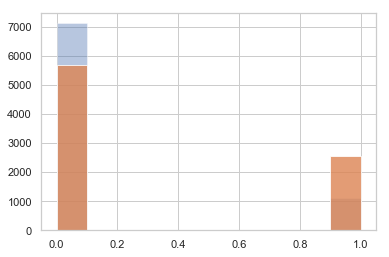

In [188]:
predicted_test=lgr_test.use(X1_test,w)
plt.hist(predicted_test,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  71.11461874696454 %
F1 score is 0.5819124750303828


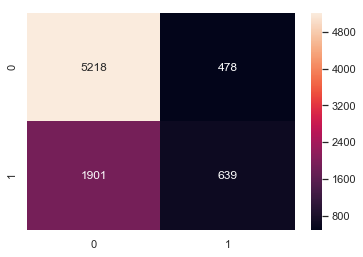

In [189]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

Accuracy:  69.82758620689656 %


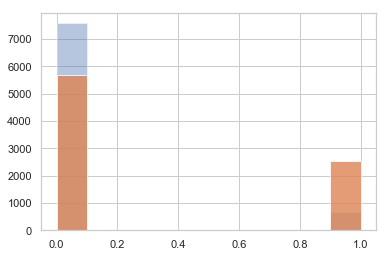

In [190]:
predicted_test1=lgr_test.use(X1_test,w1)
plt.hist(predicted_test1,alpha=0.4)
plt.hist(np.argmax(T_test,1),alpha=0.8)
print("Accuracy: ", (np.count_nonzero(np.argmax(T_test,1)==predicted_test1)/T_test.shape[0]) * 100, "%")

 Confusion Matrix accuracy is  69.82758620689656 %
F1 score is 0.5179862839963526


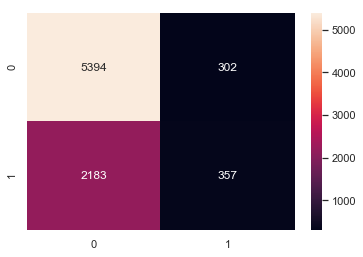

In [191]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

 Confusion Matrix accuracy is  69.82758620689656 %
F1 score is 0.5179862839963526


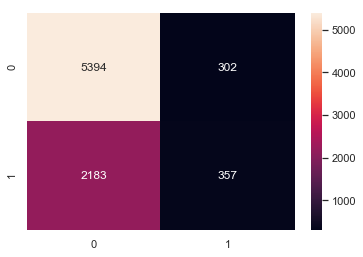

In [192]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test1)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test1, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

 Confusion Matrix accuracy is  70.71393880524526 %
F1 score is 0.4919650343040434


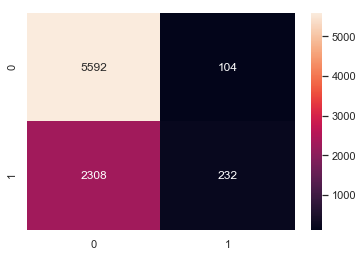

In [193]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(np.argmax(T_test,1), predicted_test2)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print(" Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(np.argmax(T_test,1), predicted_test2, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

### Above are the 5 different training/testing errors.